<a href="https://colab.research.google.com/github/Chaitra-07/chai/blob/master/Ad_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
The goal of the project is to Predict who is likely going to click on the Ad on a website based on the features of a user. Following are the features involved in this dataset which is obtained from Kaggle.

Feature	Description
1. Daily Time Spent - on a Site	Time spent by the user on a site in minutes.
2. Age-	Customer's age in terms of years.
3. Area Income	-Average income of geographical area of consumer.
4. Daily Internet Usage	-Avgerage minutes in a day consumer is on the internet.
5. Ad Topic Line -	Headline of the advertisement.
6. City	-City of the consumer.
7. Male -	Whether or not a consumer was male.
8. Country	-Country of the consumer.
9. Timestamp-	Time at which user clicked on an Ad or the closed window.
10. Clicked on Ad	0 or 1 is indicated clicking on an Ad.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
dataset = pd.read_csv('gdrive/My Drive/mydataset/advertising.csv')

In [0]:
dataset.shape

(1000, 10)

In [0]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


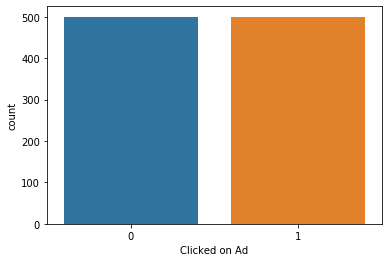

In [0]:
sb.countplot(dataset['Clicked on Ad'])

In [0]:
np.corrcoef(dataset["Age"],dataset["Clicked on Ad"])[0,1]

0.4925312655560379

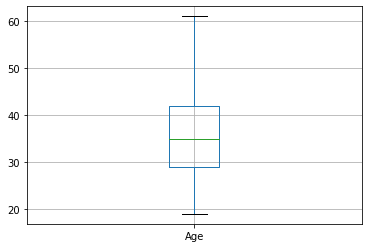

In [0]:
 dataset.boxplot(column = "Age")

In [0]:
numeric_data= dataset.select_dtypes(include=[np.number])
cat_data= dataset.select_dtypes(exclude=[np.number])
print("There are", numeric_data.shape[1]," numeric and ",cat_data.shape[1],"categorical data")

There are 6  numeric and  4 categorical data


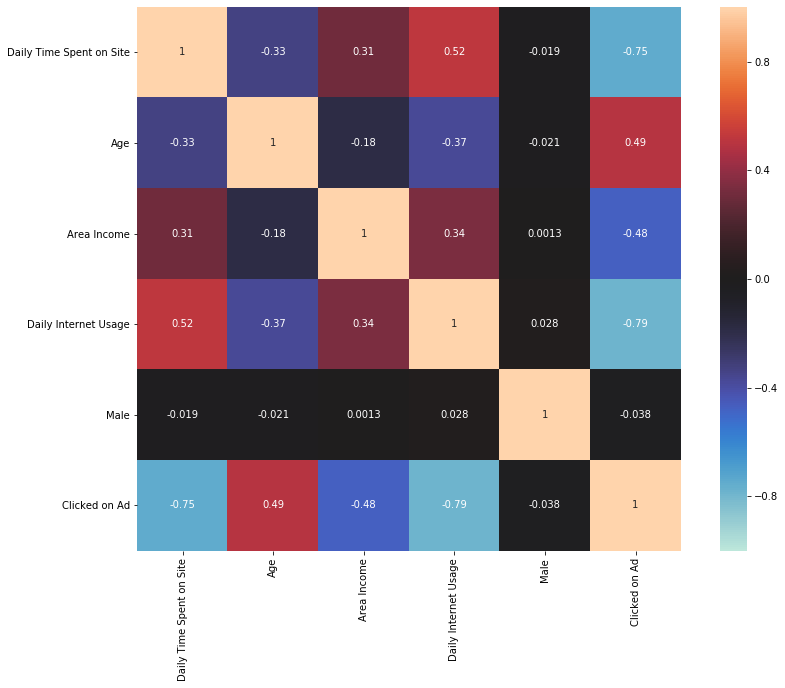

In [0]:
#For numeric data
corr= numeric_data.corr()
fig,ax =plt.subplots()
ax= sb.heatmap(corr , vmin=-1, vmax=1, annot= True, center=0, square = True )
fig.set_size_inches(14,10)

In [0]:
# Extract datetime variables using timestamp column
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
dataset['Month'] = dataset['Timestamp'].dt.month 
# Creates a new column called Month
dataset['Day'] = dataset['Timestamp'].dt.day     
# Creates a new column called Day
dataset['Hour'] = dataset['Timestamp'].dt.hour   
# Creates a new column called Hour
dataset["Weekday"] = dataset['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
dataset = dataset.drop(['Timestamp'], axis=1) # deleting timestamp

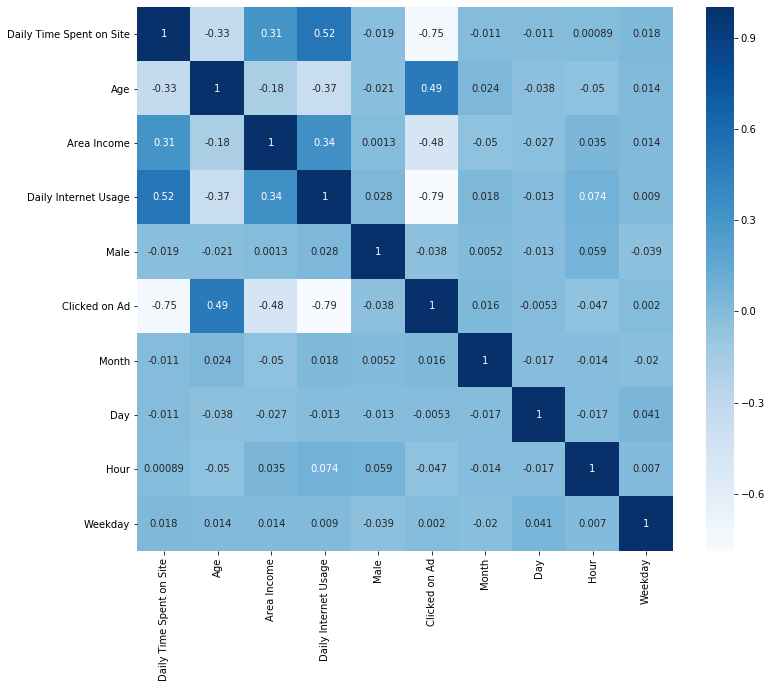

In [0]:
fig = plt.figure(figsize = (12,10))
sb.heatmap(dataset.corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

In [0]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


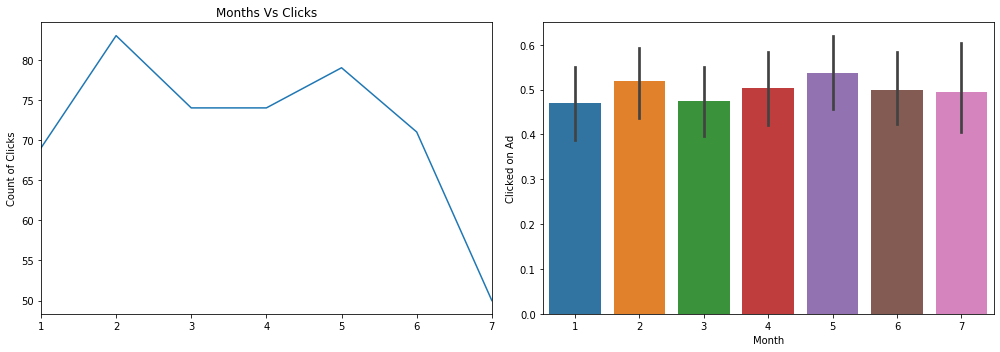

In [0]:
f,ax=plt.subplots(1,2,figsize=(14,5))
dataset['Month'][dataset['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
sb.barplot(dataset["Month"], dataset["Clicked on Ad"])
dataset.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

ValueError: ignored

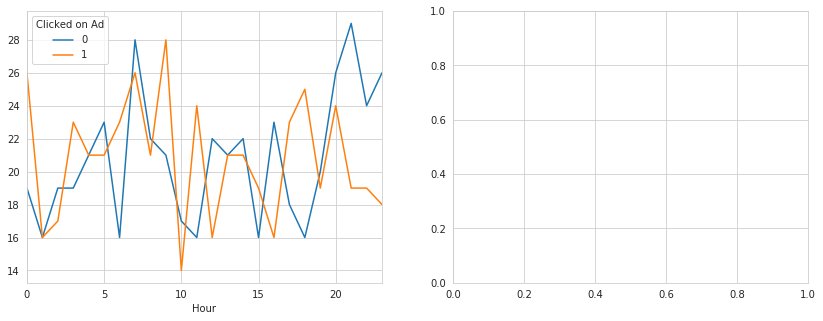

In [0]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(dataset["Clicked on Ad"], dataset["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(dataset, index =['Weekday'], values =['Clicked on Ad']).plot(kind = 'Bar', ax=ax[1],stacked=True) # 0 - Monday
plt.tight_layout()
plt.show()

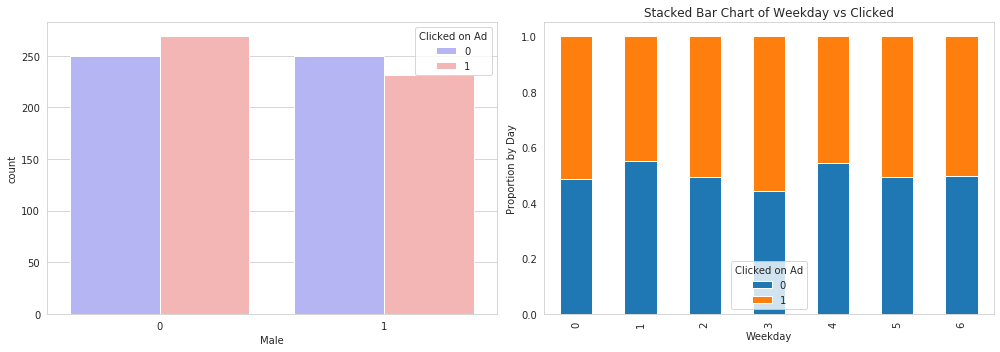

In [0]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sb.set_style('whitegrid')
sb.countplot(x='Male',hue='Clicked on Ad',data=dataset,palette='bwr', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(dataset['Weekday'],dataset['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False) # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

From the above graph it can be seen that Females click more ad than males.

Thursdays record the highest Ad-Click.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = dataset[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = dataset['Clicked on Ad']

In [0]:
# Splitting the data into train & test sets 
# test_size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because 
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [0]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()
# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)
# Below are the results of predicted click on Ads
predictions[0:20]


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
clf.predict(X_test)[0:20]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [0]:
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
print ("Random Forest AUC = %2.2f" % clf_roc_auc)
print(classification_report(y_test, clf.predict(X_test)))

log_roc_auc = roc_auc_score(y_test,predictions)
print ("Logistic Regression AUC = %2.2f" % log_roc_auc)
print(classification_report(y_test,predictions))

Random Forest AUC = 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       162
           1       0.97      0.95      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

Logistic Regression AUC = 0.91
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [0]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix for logistic regression
print(confusion_matrix(y_test, predictions))

# Printing the confusion_matrix for Random forest
print(confusion_matrix(y_test, clf.predict(X_test)))

[[156   6]
 [ 24 144]]
[[157   5]
 [  9 159]]


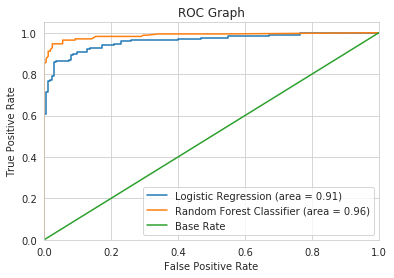

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
clf_fpr, clf_tpr, clf_thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)

# Plot Random Forest ROC
plt.plot(clf_fpr, clf_tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.plot([0,1], [0,1],label='Base Rate')

plt.legend(loc="lower right")
plt.show()

In [0]:
#Random Forest Feature Importances
#columns = X.columns
#train = pd.DataFrame(np.atleast_2d(X_train), columns=columns) # Converting numpy array list into dataframes
# Get Feature Importances
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.472618
1,Daily Time Spent on Site,0.323364
2,Area Income,0.127541
3,Age,0.072206
4,Male,0.004271


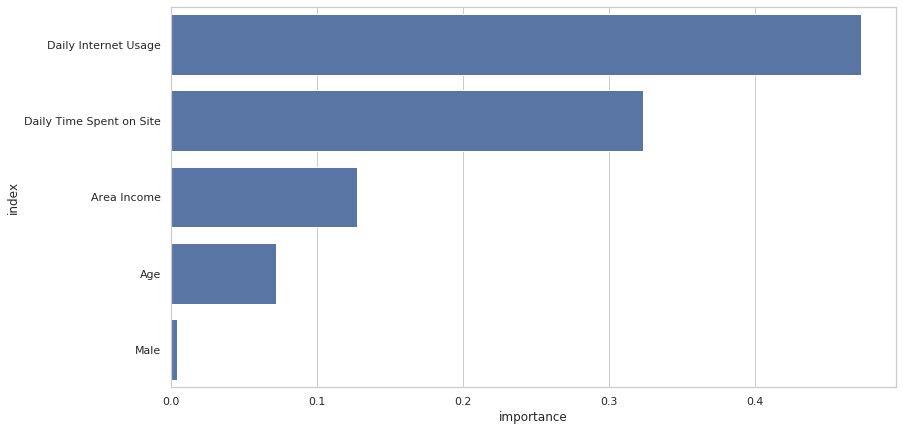

In [0]:
sb.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
#sb.set_color_codes("pastel")
sb.barplot(x="importance", y='index', data=feature_importances[0:10],
            label="Total", color="b")

Above are the dominant features our model is predicting so our target population are the people:

1. Who Spends less time on the internet
2. Who spends less time on the website
3. Who has lower income
4. Who are older than our average sample (mean around 40 years old)